In [1]:
import pandas as pd
import json
import os 
import sys
import csv

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dir = os.path.join('dataset', 'kaggle-dse')
dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/NIFTY"

files = os.listdir(dir)
files.sort()
files = [f for f in files]
print(files)

['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv', 'stock_metadata.csv']


In [3]:
# List to store the data from all CSV files
data = []

# Loop through the files
for f in files:
    # Load each CSV file into a DataFrame and append to the list
    file_path = os.path.join(dir, f)
    data.append(pd.read_csv(file_path))

# Check the number of loaded CSV files
len(data)

52

In [4]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_96508/1561586728.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs)


In [5]:
df.shape

(467112, 18)

In [6]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318.0,1.262617e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818.0,1.847699e+11,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628.0,9.981384e+10,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354.0,1.274114e+11,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589.0,3.676275e+11,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,NaN,ULTRACEMCO,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UltraTech Cement Ltd.,CEMENT & CEMENT PRODUCTS,INE481G01011
46,NaN,UPL,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPL Ltd.,FERTILISERS & PESTICIDES,INE628A01036
47,NaN,VEDL,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vedanta Ltd.,METALS,INE205A01025
48,NaN,WIPRO,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wipro Ltd.,IT,INE075A01022


In [7]:
df.drop(['Series', 'Prev Close', 'Last', 'VWAP','Turnover','Trades','Deliverable Volume','%Deliverble','Company Name','Industry','ISIN Code'], axis=1, inplace=True)


In [8]:
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2000-01-03,ASIANPAINT,370.0,390.0,370.0,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.0,392.0,375.0,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.5,390.0,371.5,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.9,384.9,374.5,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.0,390.0,370.0,385.70,9589.0
...,...,...,...,...,...,...,...
45,NaN,ULTRACEMCO,NaN,NaN,NaN,NaN,NaN
46,NaN,UPL,NaN,NaN,NaN,NaN,NaN
47,NaN,VEDL,NaN,NaN,NaN,NaN,NaN
48,NaN,WIPRO,NaN,NaN,NaN,NaN,NaN


In [9]:
df.rename(columns={'Date':'date', 'Symbol': 'tic', 'Open': 'open', 'High':'high', 'Low':'low', 'Close': 'close', 'Volume':'volume'}, inplace=True)


In [10]:
df

,date,tic,open,high,low,close,volume
0,2000-01-03,ASIANPAINT,370.0,390.0,370.0,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.0,392.0,375.0,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.5,390.0,371.5,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.9,384.9,374.5,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.0,390.0,370.0,385.70,9589.0
...,...,...,...,...,...,...,...
45,NaN,ULTRACEMCO,NaN,NaN,NaN,NaN,NaN
46,NaN,UPL,NaN,NaN,NaN,NaN,NaN
47,NaN,VEDL,NaN,NaN,NaN,NaN,NaN
48,NaN,WIPRO,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(467112, 7)

In [12]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'tic'])
df.shape

(235242, 7)

In [13]:
df = df.dropna(subset=['date', 'tic'])
df.shape

(235192, 7)

In [14]:
df

,date,tic,open,high,low,close,volume
0,2000-01-03,ASIANPAINT,370.0,390.00,370.00,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.0,392.00,375.00,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.5,390.00,371.50,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.9,384.90,374.50,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.0,390.00,370.00,385.70,9589.0
...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,190.6,191.10,185.10,186.40,8542755.0
235188,2021-04-27,ZEEL,188.0,192.95,186.80,188.15,14247767.0
235189,2021-04-28,ZEEL,188.8,190.60,187.10,189.10,8429439.0
235190,2021-04-29,ZEEL,190.8,191.65,186.00,186.55,9483009.0


In [15]:
nan_counts = df.isna().sum()
print(nan_counts)


date      0
tic       0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [16]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date      0
tic       0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [17]:
df['tic'].value_counts()

tic
ASIANPAINT    5306
HDFCBANK      5306
SUNPHARMA     5306
GRASIM        5306
SBIN          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: count, Length: 65, dtype: int64

In [18]:
import pandas as pd

# Get the value counts of the 'tic' column
tic_counts = df['tic'].value_counts(dropna=False)

# Convert the counts to a DataFrame
tic_counts_df = tic_counts.reset_index()
tic_counts_df.columns = ['Tic', 'Count']

# Save the DataFrame to a CSV file
tic_counts_df.to_csv('tic_value_counts.csv', index=False)

print(tic_counts)


tic
ASIANPAINT    5306
HDFCBANK      5306
SUNPHARMA     5306
GRASIM        5306
SBIN          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: count, Length: 65, dtype: int64


In [19]:
# Get the top 30 most frequent 'tic' values
top_30_tics = tic_counts.nlargest(30).index

# Filter the DataFrame to keep only these top 30 'tic' values
df_filtered = df[df['tic'].isin(top_30_tics)]

df = df_filtered.reset_index(drop=True)
# Display the filtered DataFrame
print(df)


              date         tic    open    high     low   close      volume
0       2000-01-03  ASIANPAINT  370.00  390.00  370.00  381.65      3318.0
1       2000-01-04  ASIANPAINT  380.00  392.00  375.00  385.55      4818.0
2       2000-01-05  ASIANPAINT  371.50  390.00  371.50  383.00      2628.0
3       2000-01-06  ASIANPAINT  384.90  384.90  374.50  377.50      3354.0
4       2000-01-07  ASIANPAINT  376.00  390.00  370.00  385.70      9589.0
...            ...         ...     ...     ...     ...     ...         ...
150826  2021-04-26       WIPRO  479.40  483.85  477.00  480.30   9314644.0
150827  2021-04-27       WIPRO  481.40  487.00  481.00  485.05   7209467.0
150828  2021-04-28       WIPRO  485.85  493.20  481.25  489.30   9615534.0
150829  2021-04-29       WIPRO  492.70  492.80  485.70  489.85   7641133.0
150830  2021-04-30       WIPRO  491.50  511.80  489.30  492.75  29115571.0

[150831 rows x 7 columns]


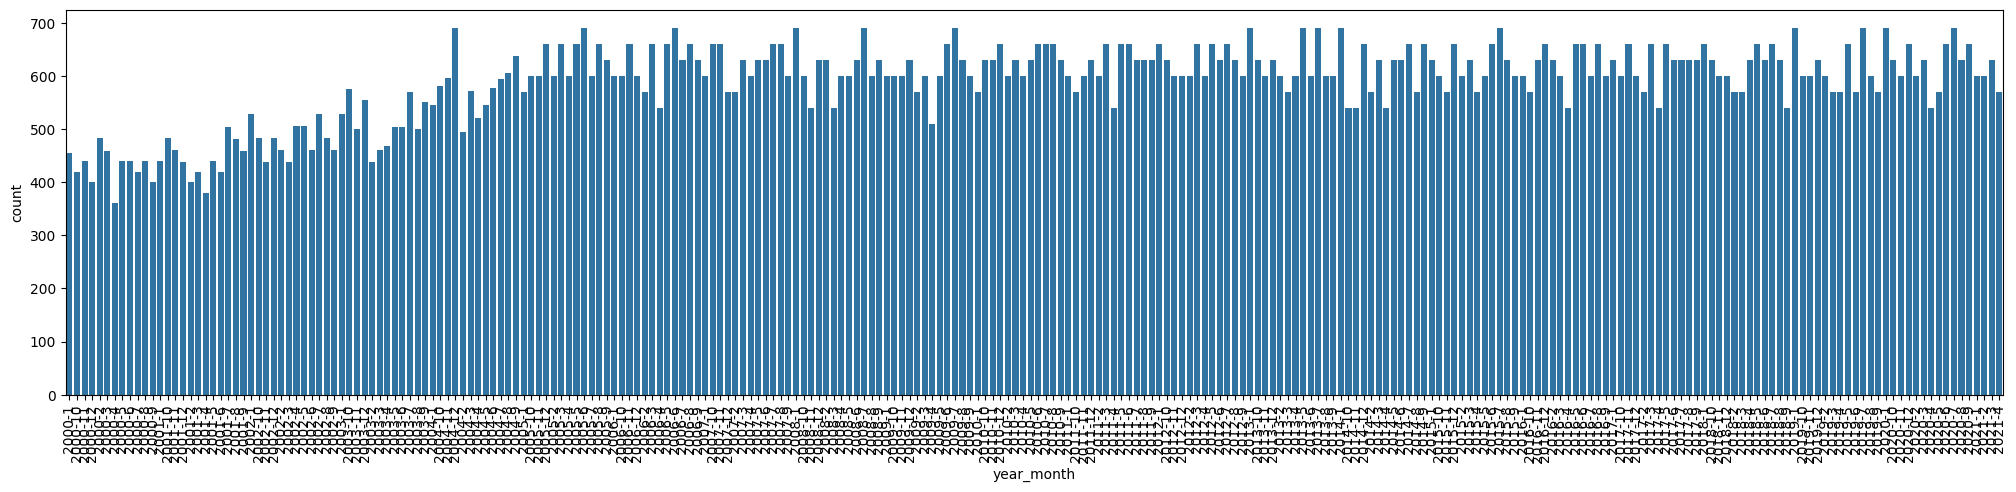

In [20]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [21]:
df['year'].value_counts()

year
2010    7560
2020    7560
2005    7530
2012    7530
2006    7500
2013    7500
2007    7470
2017    7440
2015    7440
2016    7410
2011    7410
2008    7380
2018    7380
2019    7350
2014    7320
2009    7289
2004    6959
2003    6150
2002    5773
2001    5324
2000    5156
2021    2400
Name: count, dtype: int64

In [22]:
import pandas as pd

# Ensure 'date' is properly converted to datetime
df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample days dynamically based on the number of unique days available in each year
for year, group in grouped_data:
    # Get the unique dates available for sampling
    unique_days = group['date'].nunique()
    print('ud '+ str(year)+ ' ' + str(unique_days))
    
    # Adjust the sample size based on the number of unique days
    sample_size = min(208, unique_days)  # Use smaller of 208 or the number of unique days
    
    # Sample unique days
    sampled_days = group['date'].sample(sample_size, replace=False)
    
    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

print(len(sampled_data))


ud 2000 250
ud 2001 248
ud 2002 251
ud 2003 254
ud 2004 254
ud 2005 251
ud 2006 250
ud 2007 249
ud 2008 246
ud 2009 243
ud 2010 252
ud 2011 247
ud 2012 251
ud 2013 250
ud 2014 244
ud 2015 248
ud 2016 247
ud 2017 248
ud 2018 246
ud 2019 245
ud 2020 252
ud 2021 80
70020


In [23]:
# Count zeros in the 'Volume' column
zero_count_volume = (df['volume'] == 0).sum()

print("Number of zeros in 'Volume' column:", zero_count_volume)


Number of zeros in 'Volume' column: 0


In [24]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date          0
tic           0
open          0
high          0
low           0
close         0
volume        0
year          0
month         0
year_month    0
dtype: int64


In [25]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/ml/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [26]:
df.head()

,date,tic,open,high,low,close,volume,year,month,year_month
0,2000-01-03,ASIANPAINT,370.0,390.0,370.0,381.65,3318.0,2000,1,2000-1
1,2000-01-04,ASIANPAINT,380.0,392.0,375.0,385.55,4818.0,2000,1,2000-1
2,2000-01-05,ASIANPAINT,371.5,390.0,371.5,383.00,2628.0,2000,1,2000-1
3,2000-01-06,ASIANPAINT,384.9,384.9,374.5,377.50,3354.0,2000,1,2000-1
4,2000-01-07,ASIANPAINT,376.0,390.0,370.0,385.70,9589.0,2000,1,2000-1


In [27]:
df.drop(['year_month','month','year'], axis=1, inplace=True)


In [28]:
df

,date,tic,open,high,low,close,volume
0,2000-01-03,ASIANPAINT,370.00,390.00,370.00,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.00,392.00,375.00,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.50,390.00,371.50,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.90,384.90,374.50,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.00,390.00,370.00,385.70,9589.0
...,...,...,...,...,...,...,...
150826,2021-04-26,WIPRO,479.40,483.85,477.00,480.30,9314644.0
150827,2021-04-27,WIPRO,481.40,487.00,481.00,485.05,7209467.0
150828,2021-04-28,WIPRO,485.85,493.20,481.25,489.30,9615534.0
150829,2021-04-29,WIPRO,492.70,492.80,485.70,489.85,7641133.0


In [29]:
# Assuming 'df' is your DataFrame and 'close' is the column with closing prices
std_dev = df.groupby('tic')['close'].std()

plt.figure(figsize=(10,6))
sns.histplot(std_dev, bins=50, kde=True)
plt.title('Distribution of std of the stocks')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.savefig('output.png')
plt.show()

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_96508/2605565239.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [30]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [31]:
df.dtypes

date                datetime64[ns]
tic                         object
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
day                          int32
short_resistance           float64
short_support              float64
long_resistance            float64
long_support               float64
dtype: object

In [32]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [33]:
print(df.shape)
df.tail()

(150831, 12)


,date,tic,open,high,low,close,volume,day,short_resistance,short_support,long_resistance,long_support
150826,2021-04-30,TATAMOTORS,298.2,301.30,292.55,293.85,36121668.0,4,315.00,290.5,357.00,280.55
150827,2021-04-30,TCS,3099.0,3132.05,3020.00,3035.65,3072305.0,4,3247.00,3020.0,3354.35,2880.00
150828,2021-04-30,TITAN,1500.0,1516.55,1471.00,1491.65,3691399.0,4,1560.00,1451.6,1618.00,1396.00
150829,2021-04-30,ULTRACEMCO,6380.0,6424.00,6233.55,6278.95,475175.0,4,6786.45,5970.2,7055.95,5970.20
150830,2021-04-30,WIPRO,491.5,511.80,489.30,492.75,29115571.0,4,511.80,436.0,511.80,397.75


In [34]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 208
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 208])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_96508/1344718701.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_price_pivot = df_price_pivot.pct_change()


5306


In [35]:
turbulence_index['turbulence'].max()

7928.906405510853

In [36]:
df = df.merge(turbulence_index, on="date")
df['tic'].value_counts()

tic
ASIANPAINT    5306
IOC           5306
WIPRO         5306
TITAN         5306
SUNPHARMA     5306
SBIN          5306
RELIANCE      5306
BPCL          5306
M&M           5306
ITC           5306
ONGC          5306
CIPLA         5306
ICICIBANK     5306
HDFCBANK      5306
HDFC          5306
GRASIM        5306
DRREDDY       5306
BRITANNIA     5305
EICHERMOT     5301
HCLTECH       5300
INDUSINDBK    4985
SHREECEM      4985
GAIL          4985
KOTAKBANK     4483
MARUTI        4427
TATAMOTORS    4307
LT            4184
ULTRACEMCO    4140
TCS           4139
NTPC          4088
Name: count, dtype: int64

In [37]:
df.to_csv('df.csv', index=False)  # 'index=False' prevents pandas from writing row numbers as the first column


In [38]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)



Successfully added technical indicators
(150831, 13)
(90202, 13)
(90202, 21)
Successfully added technical indicators


In [39]:
df.shape

(150831, 13)

In [40]:
print(processed['tic'].nunique())
print(processed.shape)

17
(90202, 21)


In [41]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)



In [42]:
processed_full['tic'].nunique()

17

In [43]:
print(processed_full.shape)
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

(90202, 21)


,date,tic,open,high,low,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2000-01-03,ASIANPAINT,370.00,390.00,370.00,381.65,3318.0,0.0,390.00,370.00,...,370.00,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,381.65,381.65
1,2000-01-03,BPCL,405.00,407.00,393.05,399.25,8720.0,0.0,2650.00,393.05,...,393.05,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,399.25,399.25
2,2000-01-03,CIPLA,1410.00,1457.35,1380.05,1457.35,21060.0,0.0,3766.00,1380.05,...,1380.05,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,1457.35,1457.35
3,2000-01-03,DRREDDY,1505.00,1508.25,1505.00,1508.25,13280.0,0.0,1508.25,900.75,...,738.10,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,1508.25,1508.25
4,2000-01-03,GRASIM,429.90,438.30,425.00,438.30,101578.0,0.0,438.30,128.50,...,127.45,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,438.30,438.30
5,2000-01-03,HDFC,293.50,293.50,293.50,293.50,22744.0,0.0,1028.45,293.50,...,293.50,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,293.50,293.50
6,2000-01-03,HDFCBANK,166.00,170.00,166.00,170.00,33259.0,0.0,2628.00,166.00,...,166.00,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,170.00,170.00
7,2000-01-03,ICICIBANK,74.35,74.75,71.40,74.75,286260.0,0.0,1503.65,71.40,...,71.40,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,74.75,74.75
8,2000-01-03,IOC,260.00,273.25,250.00,270.85,23700.0,0.0,958.85,250.00,...,250.00,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,270.85,270.85
9,2000-01-03,ITC,694.00,708.50,675.00,708.50,562715.0,0.0,708.50,86.85,...,86.75,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,708.50,708.50


In [44]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [45]:
# Get the minimum date value from the 'date' column
min_date = processed_full['date'].min()
print(f"Minimum Date: {min_date}")

# Get the maximum date value from the 'date' column
max_date = processed_full['date'].max()
print(f"Maximum Date: {max_date}")



Minimum Date: 2000-01-03
Maximum Date: 2021-04-30


In [46]:
TRAIN_START_DATE = '2000-01-03'
TRAIN_END_DATE = '2016-12-31'
TRADE_START_DATE = '2017-01-01'
TRADE_END_DATE = '2021-04-30'
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

71995
18190


In [47]:
stock_dimension = len(train.tic.unique())
print(stock_dimension)
trade_unique = len(trade.tic.unique())
print(trade_unique)
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

17
17
Stock Dimension: 17, State Space: 171
